<a href="https://colab.research.google.com/github/TaliNatan/DSPS_TNatan/blob/main/HW9_TNatan/HiggsSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## loading in necessary packages
import pandas as pd
import numpy as np
import pylab as pl
import os
import json
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
pip install kaggle

In [4]:
## mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd drive/MyDrive/DSPS2023

/content/drive/MyDrive/DSPS2023


In [6]:
## setting up kaggle
!chmod 600 .kaggle.json

In [7]:
envs = json.load(open(".kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [8]:
## downloading data
!kaggle competitions download -c higgs-boson

higgs-boson.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
## unzipping data
!ls higgs-boson.zip

higgs-boson.zip


In [10]:
!unzip higgs-boson.zip

Archive:  higgs-boson.zip
replace HiggsBosonCompetition_AMSMetric_rev1.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: HiggsBosonCompetition_AMSMetric_rev1.py  
replace random_submission.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: random_submission.zip   
replace test.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.zip                y

replace training.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: training.zip            


In [11]:
!unzip training.zip

Archive:  training.zip
replace training.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: training.csv            y



In [12]:
## reading in data
higgsdata = pd.read_csv("training.csv").dropna()

In [13]:
## checking data head
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [14]:
higgsdata.describe();

In [15]:
# print(higgsdata["Label"].unique())
## overwriting labels to binary values because I think it will mess it up
higgsdata["Label"] = higgsdata.Label.map({'s':0, 'b':1})

In [16]:
higgs = higgsdata.to_numpy()

In [17]:
weights = higgs[:,-2]
labels = higgs[:,-1]

higgs_cut = np.delete(higgs,(-1), axis=1) # deleting weights column
higgs_cut = np.delete(higgs_cut,(-1), axis=1) # deleting labels column
# higgs_cut.shape

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train_x, test_x, train_y, test_y = train_test_split(higgs_cut, labels, test_size = 0.20, random_state = 0)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

In [21]:
## random forest classification
rf = RandomForestClassifier(n_estimators = 50, max_depth = 5, min_samples_split = 3, random_state = 0)
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [22]:
rf.fit(train_x, train_y)

RandomForestClassifier(max_depth=5, min_samples_split=3, n_estimators=50,
                       random_state=0)

In [23]:
rf.score(train_x, train_y)

0.817825

In [24]:
rf.score(test_x, test_y)

0.8155

In [25]:
## The above scores are very similar which is a good indication that there is no
## overfitting of the training data and also, they values are decently close to
## one which means the fit is o.k.

In [26]:
## gradient boosted classifier
gbt = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(train_x, train_y)

In [27]:
gbt.score(train_x, train_y)

0.82031

In [28]:
gbt.score(test_x, test_y)

0.82016

In [29]:
## The above scores are very similar which is a good indication that there is no
## overfitting/overtraing of the training data and also, they values are
## decently close to one which means the fit is o.k. Further, I wouldn't say
## that either method is particularly good at classifying the data - I think it
## is heavily dependent on the parameters one puts in.

In [30]:
## confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

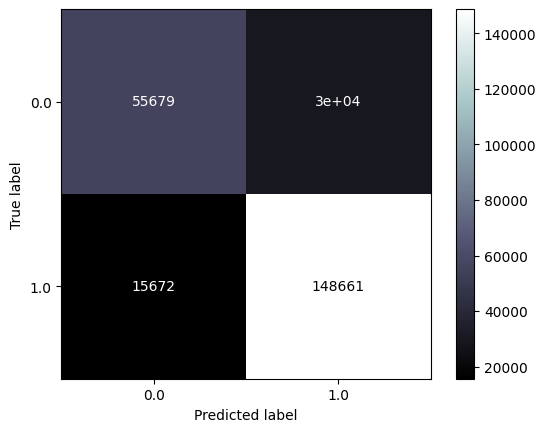

In [31]:
disp_rf = ConfusionMatrixDisplay.from_estimator(rf, higgs_cut, labels, cmap="bone")

In [32]:
## The above confusion matrix shows that on the True/True, False/False diagonal
## the random forest does well with substansially higher values there then on
## the other diagonal. This shows that the classifier is much more likely to get
## true negatives and true positives than false negatives and false positives.

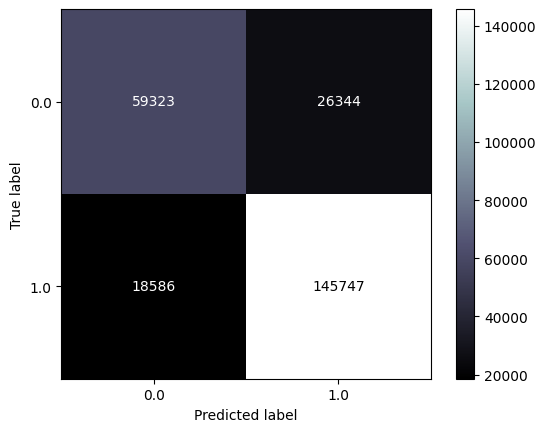

In [33]:
disp_gbt = ConfusionMatrixDisplay.from_estimator(gbt, higgs_cut, labels, cmap="bone")

In [34]:
## The above confusion matrix shows that on the True/True, False/False diagonal
## the random forest does well with substansially higher values there then on
## the other diagonal. This shows that the classifier is much more likely to get
## true negatives and true positives than false negatives and false positives.
## Looking at the two confusion matricies above, they are pretty comparable with
## rf having a slighly higher count of false positives and the gbt has a higher
## count of true positives. I wouldn't say either method is obviously better
## from these plots.

In [35]:
print(higgs_cut)

[[ 1.00000e+05  1.38470e+02  5.16550e+01 ...  1.24000e+00 -2.47500e+00
   1.13497e+02]
 [ 1.00001e+05  1.60937e+02  6.87680e+01 ... -9.99000e+02 -9.99000e+02
   4.62260e+01]
 [ 1.00002e+05 -9.99000e+02  1.62172e+02 ... -9.99000e+02 -9.99000e+02
   4.42510e+01]
 ...
 [ 3.49997e+05  1.05457e+02  6.05260e+01 ... -9.99000e+02 -9.99000e+02
   4.19920e+01]
 [ 3.49998e+05  9.49510e+01  1.93620e+01 ... -9.99000e+02 -9.99000e+02
   0.00000e+00]
 [ 3.49999e+05 -9.99000e+02  7.27560e+01 ... -9.99000e+02 -9.99000e+02
   0.00000e+00]]


In [69]:
## using a random forest and a gradient boosted tree regressor model to predict
## the weight of the particles.
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

higgs_cut, weights = make_regression(random_state=0)
traindata_weights, testdata_weights, train_weights, test_weights = train_test_split(higgs_cut, weights, random_state=0)

regrf = RandomForestRegressor(n_estimators = 50, max_depth = 5, min_samples_split = 3, random_state = 0)
regrf.fit(traindata_weights, train_weights)
regrf.predict(testdata_weights)

reggbt = GradientBoostingRegressor(n_estimators = 150, max_depth = 2, min_samples_split = 3, random_state = 0)
reggbt.fit(traindata_weights, train_weights);
reggbt.predict(testdata_weights);
# print(reggbt.score(testdata_weights, test_weights)) # r^2

In [70]:
def L1(ytrue, ypredicted):
  '''
  ytrue: 1D numpy array, true values
  ypredicted: 1D numpy array, predicted values

  returns the L1 (mean absolute error)
  '''
  return(np.sum(np.abs(ytrue-ypredicted)))

def L2(ytrue, ypredicted):
  '''
  ytrue: 1D numpy array, true values
  ypredicted: 1D numpy array, predicted values

  returns the L2 (mean squared error)
  '''
  return(np.sum(ytrue-ypredicted)**2)

In [71]:
print("Random forest L1 =",L1(test_weights, regrf.predict(testdata_weights)))
print("Random forest L2 =",L2(test_weights, regrf.predict(testdata_weights)))

Random forest L1 = 2329.295025336433
Random forest L2 = 127105.77660867645


In [72]:
print("Gradient boosted regression L1 =",L1(test_weights, reggbt.predict(testdata_weights)))
print("Gradient boosted regression L2 =",L2(test_weights, reggbt.predict(testdata_weights)))

Gradient boosted regression L1 = 2019.9103320901447
Gradient boosted regression L2 = 9373.331373439947


In [40]:
## The above values are the mean absolute error (L1) and mean squared error (L2)
## of our fitted regression models: random forest and gradient boosted
## regression. The random forest method yeild L1 an L2 values of 2329 and 127105
## respectivley while the gradient boosted method give L1 and L2 values of 2025
## and 10746. The L1 value of the gradient boosted method is slightly lower than
## the random forest bethod but the L2 value is MUCH lower (>10x smaller) so
## maybe the gradient boosted method is better (lower mean squared error).

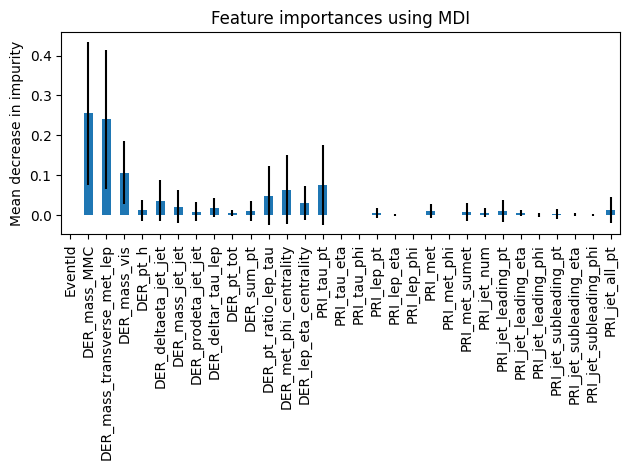

In [41]:
## feature importance and grid optimization
best_features_index = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)



feature_names = ['EventId',
                 'DER_mass_MMC',
                 'DER_mass_transverse_met_lep',
                 'DER_mass_vis','DER_pt_h',
                 'DER_deltaeta_jet_jet',
                 'DER_mass_jet_jet',
                 'DER_prodeta_jet_jet',
                 'DER_deltar_tau_lep',
                 'DER_pt_tot',
                 'DER_sum_pt',
                 'DER_pt_ratio_lep_tau',
                 'DER_met_phi_centrality',
                 'DER_lep_eta_centrality',
                 'PRI_tau_pt',
                 'PRI_tau_eta',
                 'PRI_tau_phi',
                 'PRI_lep_pt',
                 'PRI_lep_eta',
                 'PRI_lep_phi',
                 'PRI_met',
                 'PRI_met_phi',
                 'PRI_met_sumet',
                 'PRI_jet_num',
                 'PRI_jet_leading_pt',
                 'PRI_jet_leading_eta',
                 'PRI_jet_leading_phi',
                 'PRI_jet_subleading_pt',
                 'PRI_jet_subleading_eta',
                 'PRI_jet_subleading_phi',
                 'PRI_jet_all_pt']

forest_importances = pd.Series(best_features_index, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [42]:
## The above bar plot shows the feature importance (from mean decrease in
## impurity) for all the features in the original dataset (minus signal and
## label). From this plot, we can see that while Der_mass_MMC and
## DER_mass_transverse_met_lep obviously are the most important features, their
## uncertainty is HUGE but even at the bottom of their uncertainties, they are
## still among the most important features. After those two features, though, it
## is a big drop before the next important features which - if we wanted to
## further simply our RandomizedSearchCV, we could just use those two features.
## Also, this plot kind of eliminates searching for connections between certain
## features that have low/zero mean decrease in impurity.

In [43]:
best_features_index = np.argsort(best_features_index)[-4:] # 4 most important features

In [44]:
higgs_short = higgsdata.iloc[:, best_features_index].dropna()
## unique headers (most important features) are PRI_tau_pt, DER_mass_vis,
## DER_mass_transverse_met_lep, and DER_mass_MMC. According to the original
## paper (Adam-Bourdarios, Cowan, Germain, Guyon, Kegl, & Rousseau, 2015), these
## features are the "transverse momentum of the hadronic tau", "the invariant
## mass of the hadronic tau and the lepton", "the transverse mass between the
## missing transverse energy and the lepton", and the "estimated mass of the
## Higgs boson candidate". From this, it seems that the features that are most
## important/interconnected to the data have to do with mass-based variables
## such as momentum and energy (and estimated mass of course). This makes sense
## to someone outside of particle physics (me) considering that Higgs Bosons
## only couple with mass.

In [46]:
# FROM PAULA

random_grid = {
    'max_depth': [3, 10, None],
    'max_features': ['auto', 'sqrt'],
    'n_estimators': [10, 100, 1000]}
# print(random_grid)

In [47]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(estimator = rf, param_distributions=random_grid, n_iter=1, cv=3, refit=False)

In [48]:
random_search.fit(higgs_short.values, higgsdata["Label"])

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=5,
                                                    min_samples_split=3,
                                                    n_estimators=50,
                                                    random_state=0),
                   n_iter=1,
                   param_distributions={'max_depth': [3, 10, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 100, 1000]},
                   refit=False)

In [49]:
df = pd.DataFrame(random_search.cv_results_) # this shows the result for the given parameters
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,5.925093,2.636786,0.11732,0.001476,10,auto,10,"{'n_estimators': 10, 'max_features': 'auto', '...",0.813653,0.813435,0.816063,0.814384,0.001191,1


In [58]:
higgs_cut = np.delete(higgs,(-1), axis=1) # deleting weights column
higgs_cut = np.delete(higgs_cut,(-1), axis=1) # deleting labels column

y_pred_grd_rfcat = rf.predict_proba(test_x)[:, 1] # probabalistic classification

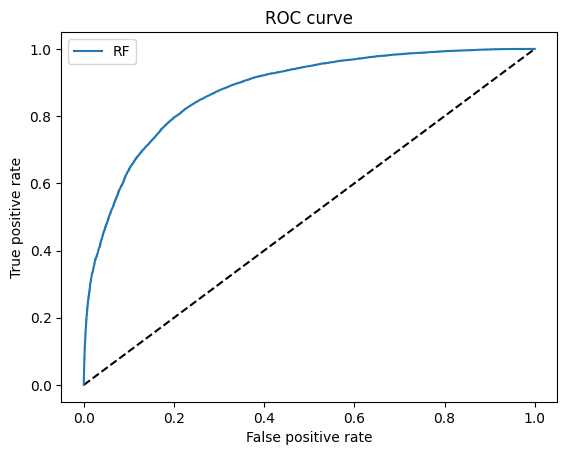

In [62]:
# The random forest model by itself
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

fpr_rf, tpr_rf, _ = roc_curve(test_y, y_pred_grd_rfcat)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
## The above plot shows the receiver operating characteristic (ROC) curve (blue)
## for the above model. This is best viewed in comparison to the outcome of a
## random classifier (dashed black line). Since the blue curve is above this
## line, our classifier is better than random. A perfect classifier preformance
## would appear on a ROC plot as a point at (0,1). At different thresholds, the
## blue curve is closer to (0,1) than the black dashed line.